 ## Import Libraries

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Load Dataset

In [34]:
# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

In [35]:
# Load dataset
df = pd.read_csv("C:/Users/512GB/OneDrive/Documents/Company tasks/data/movies.csv")  

## Generate Basic Statistics

In [36]:
def generate_basic_stats(df):
    """Generate basic statistical analysis"""
    return {
        'Total Movies': len(df),
        'Average Budget': f"${df['budget'].mean():,.2f}",
        'Average Revenue': f"${df['revenue'].mean():,.2f}",
        'Average Rating': f"{df['vote_average'].mean():.2f}",
        'Average Runtime': f"{df['runtime'].mean():.2f} minutes"
    }

# Call the function
stats = generate_basic_stats(df)
print("Basic Statistics:")
for key, value in stats.items():
    print(f"{key}: {value}")

Basic Statistics:
Total Movies: 4803
Average Budget: $29,045,039.88
Average Revenue: $82,260,638.65
Average Rating: 6.09
Average Runtime: 106.88 minutes


In [37]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Get Top N Movies by Column

In [38]:
def get_top_movies(df, column, n=10):
    """Get top N movies by specified column"""
    return df.nlargest(n, column)[
        ['title', column, 'release_date', 'vote_average']
    ].reset_index(drop=True)

# Call the function
top_revenue_movies = get_top_movies(df, 'revenue', n=10)
print("\nTop 10 Movies by Revenue:")
print(top_revenue_movies)


Top 10 Movies by Revenue:
                        title     revenue release_date  vote_average
0                      Avatar  2787965087   2009-12-10           7.2
1                     Titanic  1845034188   1997-11-18           7.5
2                The Avengers  1519557910   2012-04-25           7.4
3              Jurassic World  1513528810   2015-06-09           6.5
4                   Furious 7  1506249360   2015-04-01           7.3
5     Avengers: Age of Ultron  1405403694   2015-04-22           7.3
6                      Frozen  1274219009   2013-11-27           7.3
7                  Iron Man 3  1215439994   2013-04-18           6.8
8                     Minions  1156730962   2015-06-17           6.4
9  Captain America: Civil War  1153304495   2016-04-27           7.1


In [39]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

## Analyze Genre Distribution

In [40]:
def analyze_genres(df):
    """Analyze genre distribution"""
    genres = []
    for genre_list in df['genres']:
        if isinstance(genre_list, list):  
            genres.extend(genre_list)
    return pd.Series(genres).value_counts()

# Call the function
genre_counts = analyze_genres(df)
print("\nGenre Distribution:")
print(genre_counts.head(10))


Genre Distribution:
Series([], Name: count, dtype: int64)


## Plot Genre Distribution

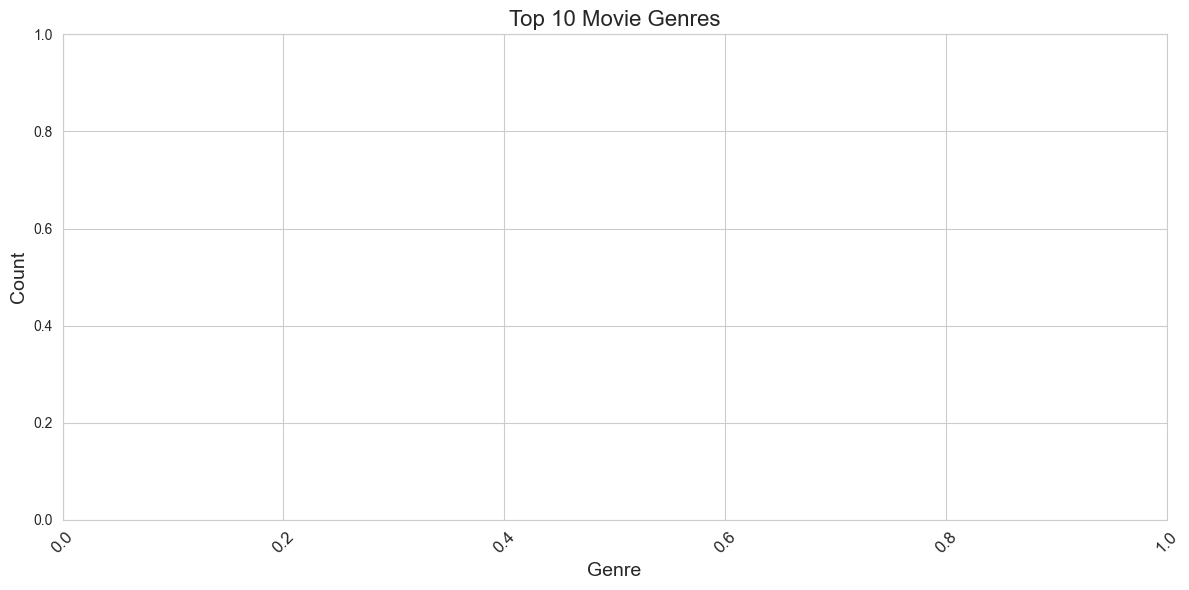

In [41]:
def plot_genre_distribution(df):
    """Plot top genres distribution"""
    genre_counts = analyze_genres(df).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
    plt.title('Top 10 Movie Genres', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_genre_distribution(df)

## Further Inspection of Genre Column

In [42]:
# Inspect the first few entries of the 'genres' column
print(df['genres'].head())

0    Action Adventure Fantasy Science Fiction
1                    Adventure Fantasy Action
2                      Action Adventure Crime
3                 Action Crime Drama Thriller
4            Action Adventure Science Fiction
Name: genres, dtype: object


In [43]:
# Split the 'genres' column into lists of genre names
df['genre_names'] = df['genres'].str.split()

# Verify the result
print(df['genre_names'].head())

0    [Action, Adventure, Fantasy, Science, Fiction]
1                      [Adventure, Fantasy, Action]
2                        [Action, Adventure, Crime]
3                  [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science, Fiction]
Name: genre_names, dtype: object


In [44]:
def analyze_genres(df):
    """Analyze genre distribution"""
    genres = []
    for genre_list in df['genre_names']:
        if isinstance(genre_list, list):  # Ensure the data is in list format
            genres.extend(genre_list)
    return pd.Series(genres).value_counts()

## Plot Genre Distribution

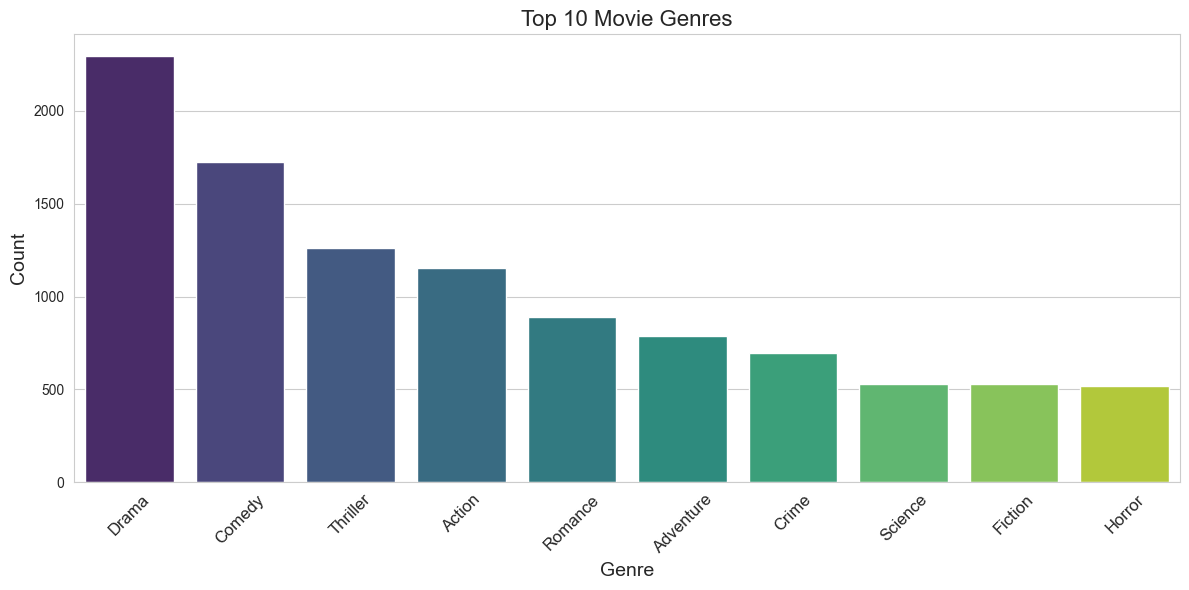

In [45]:
def plot_genre_distribution(df):
    """Plot top genres distribution"""
    genre_counts = analyze_genres(df).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
    plt.title('Top 10 Movie Genres', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_genre_distribution(df)

## Analyze Language Distribution

In [46]:
def analyze_languages(df):
    """Analyze language distribution"""
    return df['original_language'].value_counts()

# Call the function
language_counts = analyze_languages(df)
print("\nLanguage Distribution:")
print(language_counts.head(10))


Language Distribution:
original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
Name: count, dtype: int64


## Plot Budget vs Revenue Correlation

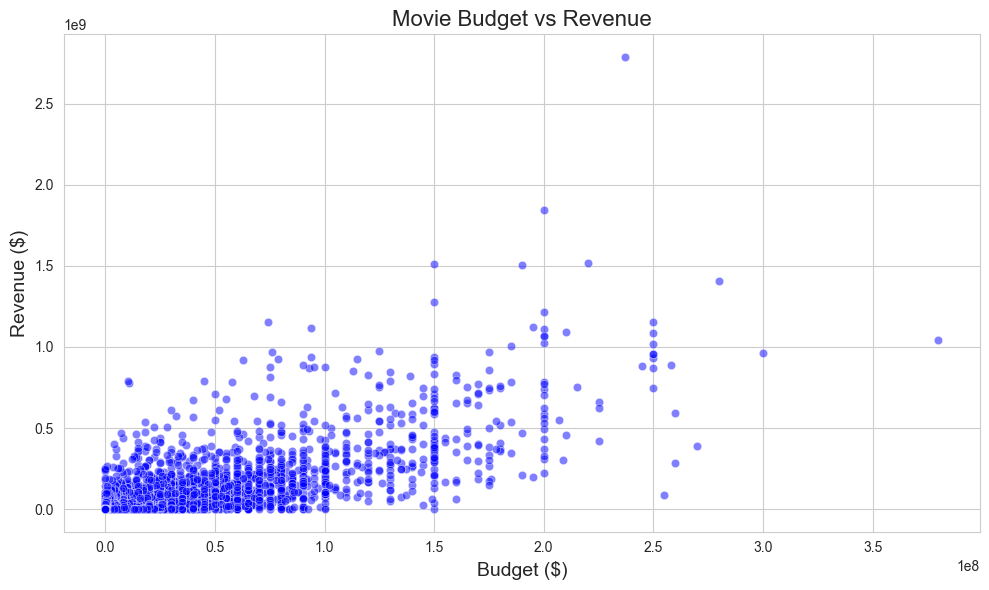

In [47]:
def plot_budget_revenue_correlation(df):
    """Plot budget vs revenue correlation"""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5, color='blue')
    plt.xlabel('Budget ($)', fontsize=14)
    plt.ylabel('Revenue ($)', fontsize=14)
    plt.title('Movie Budget vs Revenue', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_budget_revenue_correlation(df)

## Plot Rating Distribution

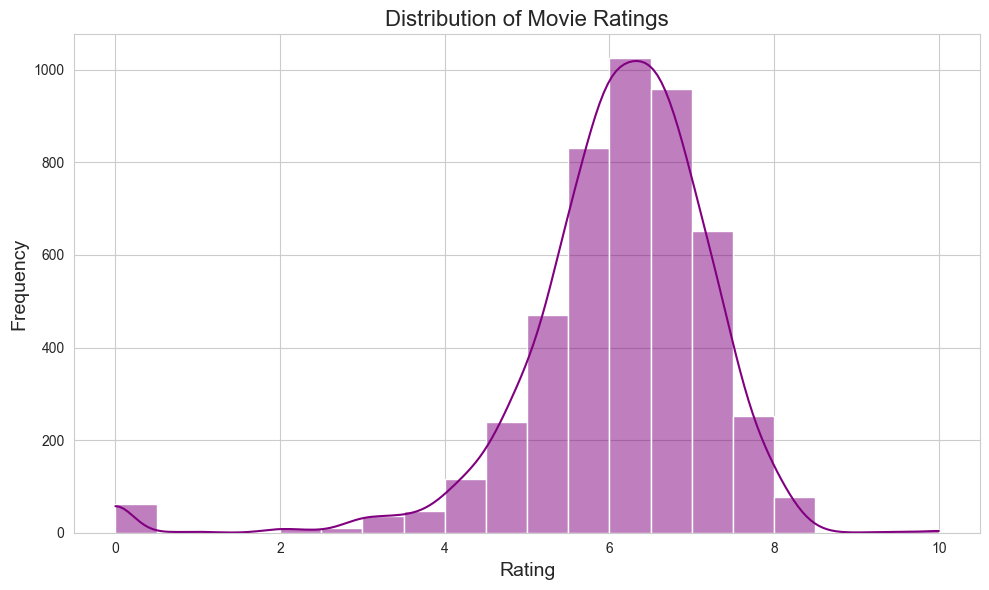

In [48]:
def plot_rating_distribution(df):
    """Plot distribution of movie ratings"""
    plt.figure(figsize=(10, 6))
    sns.histplot(df['vote_average'], bins=20, kde=True, color='purple')
    plt.title('Distribution of Movie Ratings', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the function
plot_rating_distribution(df)

## Plot Runtime Distribution

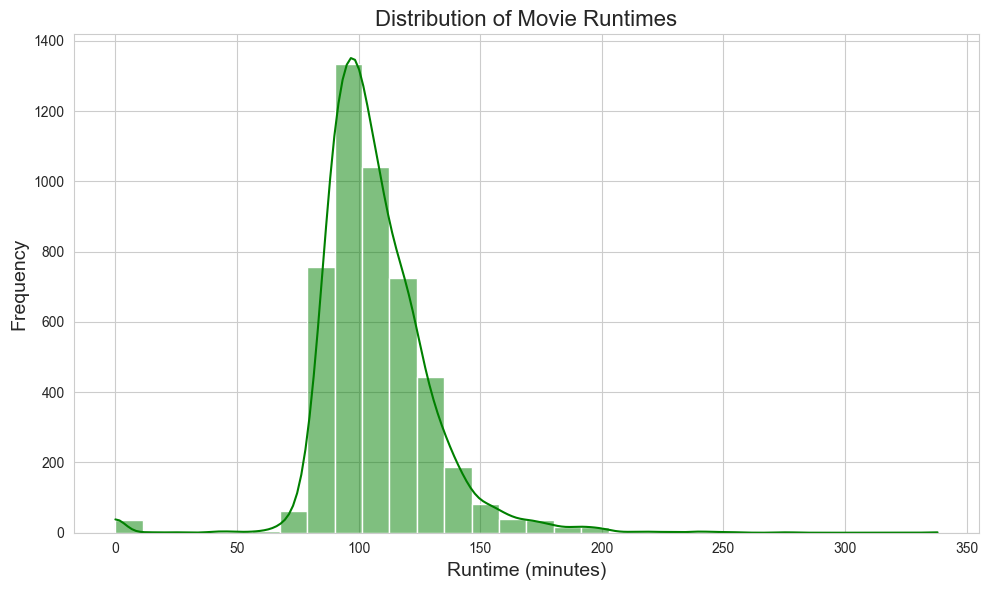

In [49]:
def plot_runtime_distribution(df):
    """Plot distribution of movie runtimes"""
    plt.figure(figsize=(10, 6))
    sns.histplot(df['runtime'], bins=30, kde=True, color='green')
    plt.title('Distribution of Movie Runtimes', fontsize=16)
    plt.xlabel('Runtime (minutes)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.tight_layout()
    plt.show()

# Call the function
plot_runtime_distribution(df)

## Plot Release Year Trends

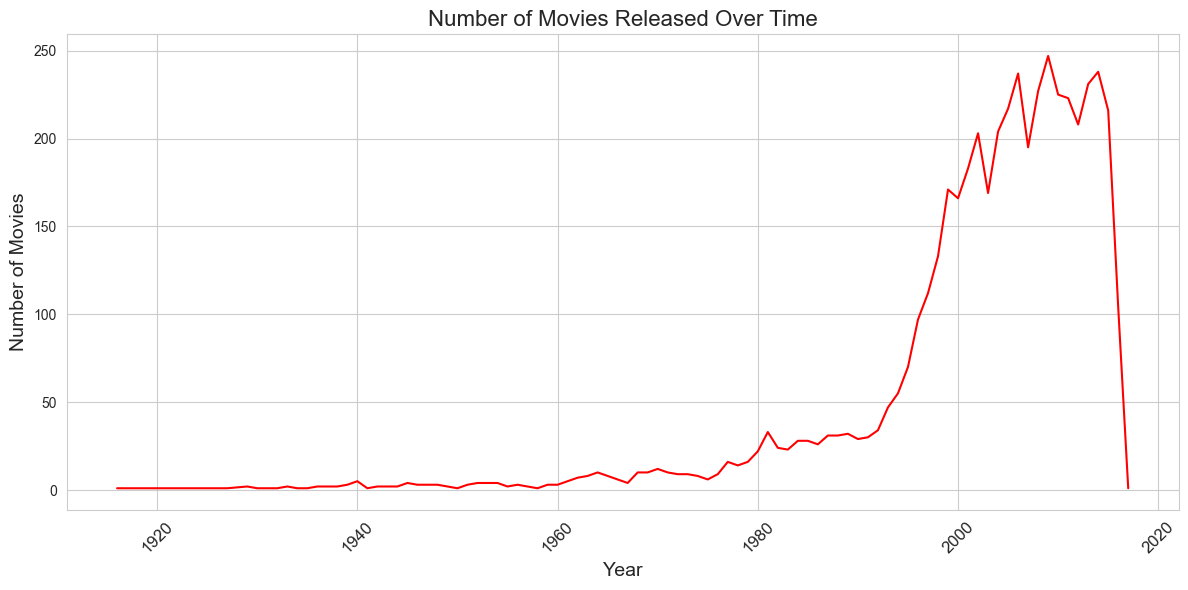

In [50]:
def plot_release_year_trends(df):
    """Plot trends of movie releases over years"""
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year
    release_counts = df['release_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=release_counts.index, y=release_counts.values, color='red')
    plt.title('Number of Movies Released Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_release_year_trends(df)

## Analyze Profitability

In [51]:
def analyze_profitability(df):
    """Analyze profitability of movies"""
    df['profit'] = df['revenue'] - df['budget']
    df['profit_margin'] = (df['profit'] / df['budget']) * 100
    return {
        'Average Profit': f"${df['profit'].mean():,.2f}",
        'Average Profit Margin': f"{df['profit_margin'].mean():.2f}%"
    }

# Call the function
profitability = analyze_profitability(df)
print("\nProfitability Analysis:")
for key, value in profitability.items():
    print(f"{key}: {value}")


Profitability Analysis:
Average Profit: $53,215,598.78
Average Profit Margin: inf%


## Plot Profit vs Budget

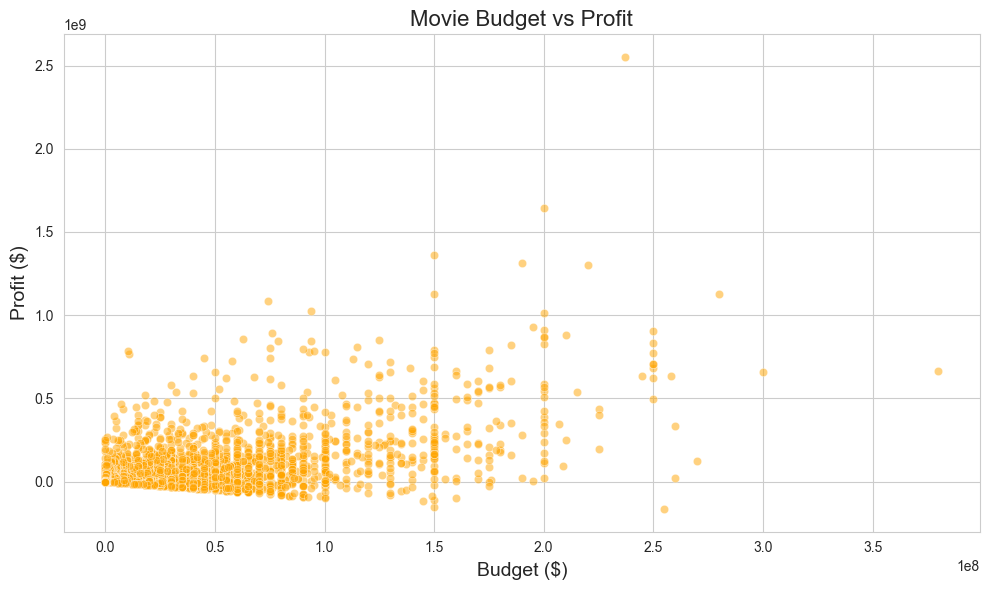

In [52]:
def plot_profit_vs_budget(df):
    """Plot profit vs budget"""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='budget', y='profit', alpha=0.5, color='orange')
    plt.xlabel('Budget ($)', fontsize=14)
    plt.ylabel('Profit ($)', fontsize=14)
    plt.title('Movie Budget vs Profit', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_profit_vs_budget(df)

## Correlation Map of Numerical Features

In [53]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['index', 'budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'release_year', 'profit', 'profit_margin']


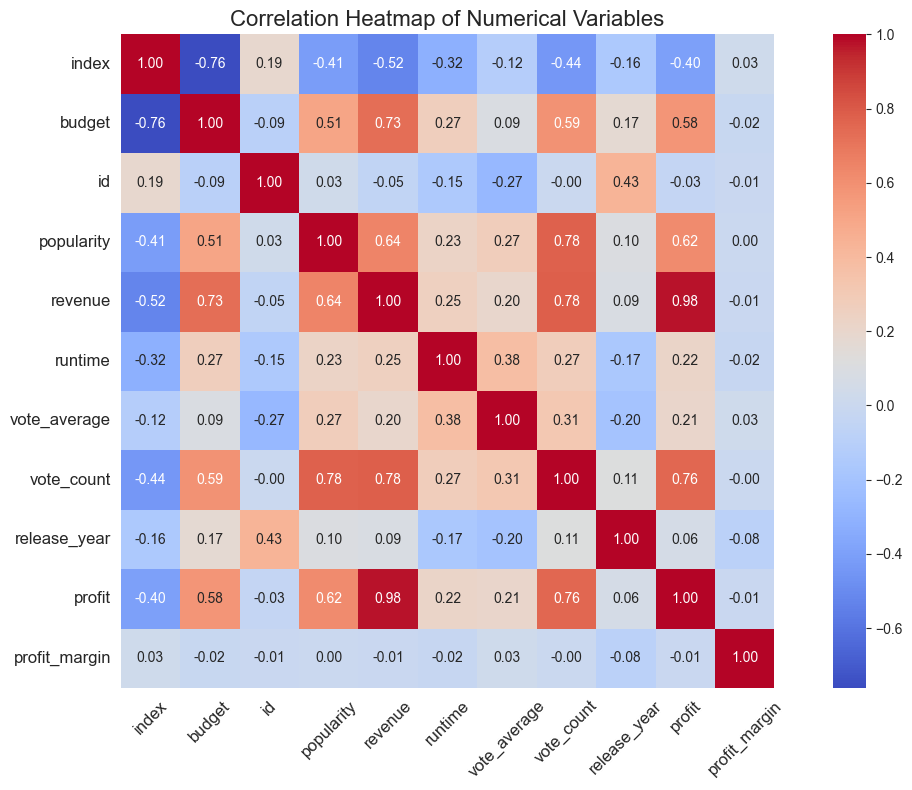

In [54]:
def plot_correlation_heatmap(df):
    """Create a correlation heatmap for numerical variables"""
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Compute the correlation matrix
    correlation_matrix = df[numerical_columns].corr()
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Show correlation values
        fmt=".2f",   # Format correlation values to 2 decimal places
        cmap="coolwarm",  # Use a diverging color palette
        cbar=True,   # Show color bar
        square=True  # Make cells square
    )
    
    # Add title and labels
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for readability
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
plot_correlation_heatmap(df)